In [195]:
# Bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


In [196]:
# dataset = pd.read_csv('WDO$N_M1.csv',sep='\t')
# pd.set_option('display.max_column', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_colwidth', 500)
# pd.set_option('expand_frame_repr', True)
#linha pega o preço de abertura de abertura pro treinamento
# reducao = dataset.loc[:,['<DATE>','<TIME>','<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
# reducao.to_csv('reduzidoTotal.csv', sep='\t',index= False)
# reducao
#dataset.shape
#dataset.info()

# result.to_csv('gapsDiaFecha.csv',sep='\t',index = False)
#gaps2.shape
# gaps.to_csv('gapsDiaDiaWDO_M1.csv', sep='\t',index = False)

# gaps = pd.read_csv('gapsDiaDiaWDO_M1.csv', sep='\t')
# gaps

# dataset.loc[1290:1400,]

In [197]:
# #dia 2 do gap
# filtro_gap =  ( abs(dataset['<OPEN>'] - dataset.shift()['<CLOSE>'])>5) 
# filtro_gap_dia = ( dataset['<DATE>'] != dataset.shift()['<DATE>'] ) 
# teste = filtro_gap & filtro_gap_dia
# # filtro_gap
# gaps = dataset.loc[teste]

# #dia 1 do gap
# filtro_dia_ant_pre = (abs(dataset['<CLOSE>'] - dataset.shift(-1)['<OPEN>']) >5)
# filtro_dia_ant_data =  (dataset['<DATE>'] != dataset.shift(-1)['<DATE>'])

# preco_ant = filtro_dia_ant_pre & filtro_dia_ant_data
# gaps2 = dataset.loc[preco_ant]

# precosFechamento = gaps2.loc[:,['<CLOSE>']]
# precosFechamento.rename(columns ={ '<CLOSE>':'<PRECO_ANT>'},inplace = True)
# # precosFechamento.to_csv('precoFecha.csv', sep='\t',index= False)

# gaps = pd.read_csv('gapsDiaDiaWDO_M1.csv', sep='\t')
# precosFechamento = pd.read_csv('precoFecha.csv',sep='\t')
# result = pd.merge(gaps, precosFechamento, left_index=True, right_index=True)

# reducao = result.loc[:,['<DATE>','<TIME>','<OPEN>','<CLOSE>','<PRECO_ANT>']]
# reducao.to_csv('reduzido.csv', sep='\t',index= False)
# reducao
# gaps5 = pd.read_csv('gaps.csv')
# gaps = pd.read_csv('gapsPrecoTempoTam.csv',sep = '\t')
# mm = pd.read_csv('minMaxAnt.csv')

# tempos2 = pd.read_csv('precosLow.csv',sep='\t')
# datas = pd.read_csv('gapsHjMaior.csv',sep = '\t')
# preco = pd.read_csv('altprecomax.csv',sep='\t')
# tempos = pd.read_csv('altTempofecha.csv',sep='\t')
# tempos2 = pd.read_csv('altTempomax.csv',sep='\t')
# result = pd.merge(datas, tempos, left_index=True, right_index=True)
# result2 = pd.merge(result, tempos2, left_index=True, right_index=True)
# result3 = pd.merge(result2, preco, left_index=True, right_index=True)
# result3.to_csv('gapsAtualMaiorFinals.csv', sep='\t',index= False)
# result3

# datas = pd.read_csv('gapsAtualMaiorFinals.csv',sep='\t')
# datas
# aux1 = datas.loc[:,['<DATE>','<TIME>','<OPEN>','<HIGH>','<LOW>','<CLOSE>','<TICKVOL>','<VOL>','<PRECO_ANT>']]
# filtro1 = aux1['<PRECO_ANT>'] < aux1['<OPEN>']
# aux2 = aux1.loc[filtro1]
# aux2.to_csv('gapsOntemMaior.csv', sep='\t',index= False)
# aux2.to_csv('gapsHjMaior.csv', sep='\t',index= False)
# aux2

# gapsfechadosDecres =( ( datas['<TAM_GAP>']<0) & (datas['<TEMP_GAP>']!=21))
# aux1 = datas.loc[gapsfechadosDecres]
# aux1.to_csv('gapsfechaCr.csv', sep='\t',index= False)
 
# gapsfechadosCres = ((datas['<TAM_GAP>']>0) & (datas['<TEMP_GAP>']!=21))
# aux2 = datas.loc[gapsfechadosCres]
# aux2.to_csv('gapsfechaDr.csv', sep='\t',index= False)

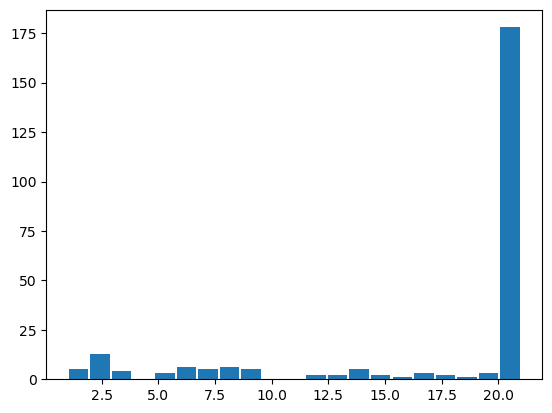

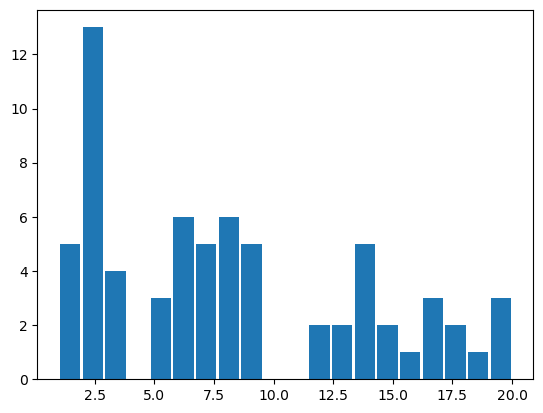

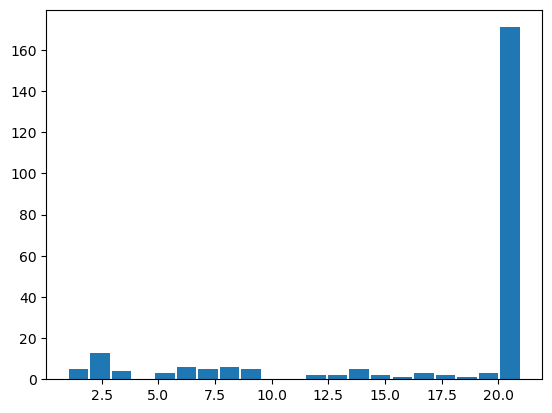

In [198]:

#linha abaixo pega as colunas datas, preço de abertura e close
#aux = dataset.loc[:,['<DATE>','<OPEN>','<CLOSE>']]
#aux

datas = pd.read_csv('gapsAtualMenorFinals.csv',sep = '\t')

plt.hist(datas['<TEMP_FEC>'], 21, rwidth = 0.9)
plt.show()

fechou = datas['<TEMP_FEC>']<21

plt.hist(datas['<TEMP_FEC>'].loc[fechou], 20, rwidth = 0.9)
plt.show()

naoFechou = (datas['<TEMP_FEC>']==21) & (abs(datas['<precoLow>'])<35)

menoresGaps = abs(datas['<precoLow>'])<35

plt.hist(datas['<TEMP_FEC>'].loc[menoresGaps], 21, rwidth = 0.9)
plt.show()



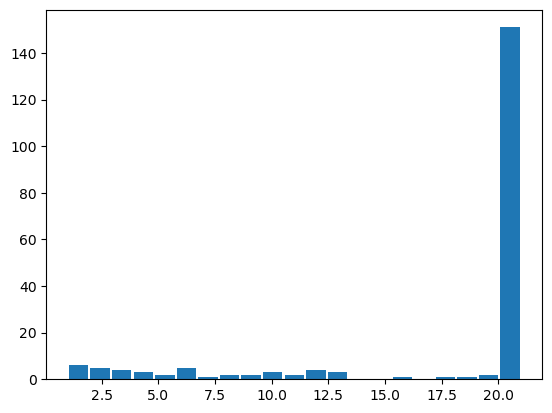

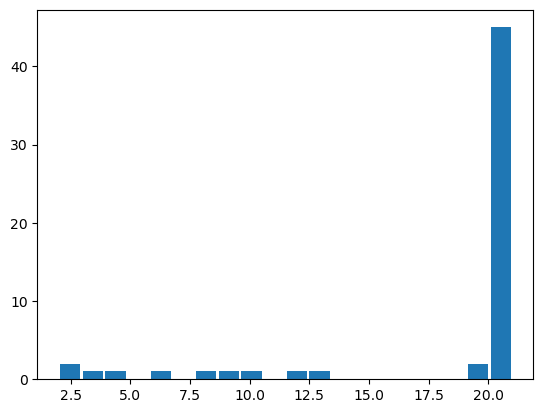

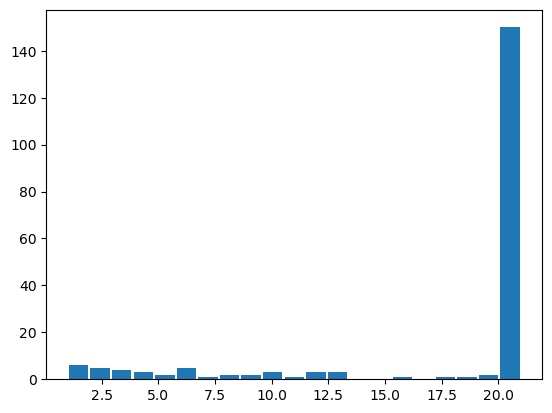

In [199]:
datas2 = pd.read_csv('gapsAtualmaiorFinals.csv',sep = '\t')

plt.hist(datas2['<TEMP_FEC>'], 21, rwidth = 0.9)
plt.show()

fechou2 = datas2['<TEMP_FEC>']<21

plt.hist(datas2['<TEMP_FEC>'].loc[fechou], 20, rwidth = 0.9)
plt.show()

naoFechou2 = (datas2['<TEMP_FEC>']==21) & (abs(datas2['<PRECO_HIGH>'])<35)

menoresGaps2 = abs(datas2['<PRECO_HIGH>'])<35

plt.hist(datas2['<TEMP_FEC>'].loc[menoresGaps], 21, rwidth = 0.9)
plt.show()

In [200]:
fig  = px.scatter(datas, x = '<TEMP_FEC>', y = '<precoLow>', width = 1000)
fig.update_xaxes(title = 'tempo  para fechar o gap(min)')
fig.update_yaxes(title = 'tamanho do gap')
fig.show()

# tempo para fechar e para ter o minimo anterior fechou
fig2  = px.scatter(datas, x = datas['<TEMP_FEC>'].loc[fechou], y = datas['<TEMP_LOW>'].loc[fechou],color=datas['<precoLow>'].loc[fechou], width = 1000)
fig2.update_xaxes(title = 'tempo para fechar')
fig2.update_yaxes(title = 'tempo para atingir o low')
fig2.show()







In [201]:
fig3  = px.scatter(datas2, x = '<TEMP_FEC>', y = '<PRECO_HIGH>', width = 1000)
fig3.update_xaxes(title = 'tempo  para fechar o gap(min)')
fig3.update_yaxes(title = 'tamanho do gap')
fig3.show()

# tempo para fechar e para ter o minimo anterior fechou
fig4  = px.scatter(datas2, x = datas2['<TEMP_FEC>'].loc[fechou2], y = datas2['<TEMP_HIGH>'].loc[fechou2],color=datas2['<PRECO_HIGH>'].loc[fechou2], width = 1000)
fig4.update_xaxes(title = 'tempo para fechar')
fig4.update_yaxes(title = 'tempo para atingir o high')
fig4.show()